
<p align ="left"><font size="5">Program to implement Homomorphic Filtering</font></p>

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
import logging
import numpy as np

# Homomorphic filter class
class HomomorphicFilter:
  def __init__(self, a = 0.5, b = 1.5):
      self.a = float(a)
      self.b = float(b)

  def __butterworth_filter(self, I_shape, filter_params):
        P = I_shape[0]/2
        Q = I_shape[1]/2
        U, V = np.meshgrid(range(I_shape[0]), range(I_shape[1]), sparse=False, indexing='ij')
        Duv = (((U-P)**2+(V-Q)**2)).astype(float)
        H = 1/(1+(Duv/filter_params[0]**2)**filter_params[1])
        return (1 - H)

  def __apply_filter(self, I, H):
        H = np.fft.fftshift(H)
        I_filtered = (self.a + self.b*H)*I
        return I_filtered

  def filter(self, I, filter_params, filter='butterworth', H = None):
        # Take the image to log domain and then to frequency domain
        I_log = np.log1p(np.array(I, dtype="float"))
        I_fft = np.fft.fft2(I_log)
        H = self.__butterworth_filter(I_shape = I_fft.shape, filter_params = filter_params)

        # Apply filter on frequency domain then take the image back to spatial domain
        I_fft_filt = self.__apply_filter(I = I_fft, H = H)
        I_filt = np.fft.ifft2(I_fft_filt)
        I = np.exp(np.real(I_filt))-1
        return np.uint8(I)




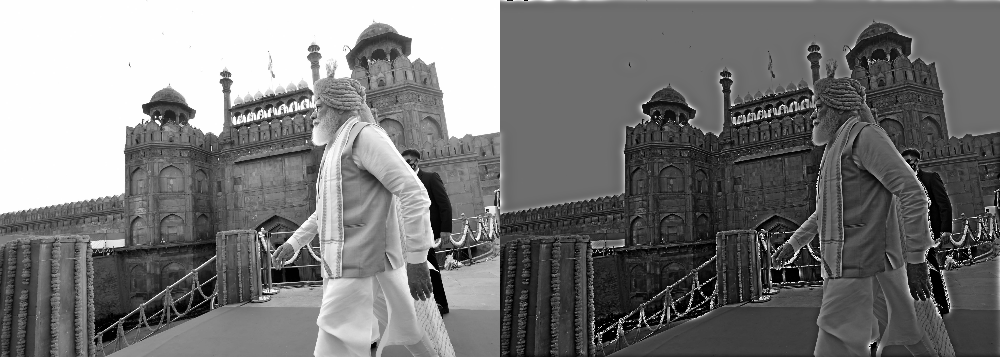

In [ ]:
def main():
  img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CV_IMAGES/IMG_20210815_145050.jpg",0)

  aspect =(round(img.shape[1]/img.shape[0],2))
  width =500
  height = int((width/aspect))
  resize_points = (width, height)
  img = cv2.resize(img, resize_points)

  homo_filter = HomomorphicFilter(a = 0.85, b = 1.25)
  img_filtered = homo_filter.filter(I=img, filter_params=[30,2])
  cv2_imshow(cv2.hconcat([img, img_filtered]))
main()